In [2]:
# -*- coding: utf-8 -*-
#
# Based on Keras MNIST CNN example (François Chollet)
# https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
# LICENSE : The MIT License (MIT)
#
from __future__ import print_function
import numpy as np
np.set_printoptions(threshold=np.nan) # NumPy:print時に要素を省略しない
np.random.seed(20170712)              # NumPy:シード値を固定
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128 # 学習時のバッチ処理サイズ
num_classes = 10 # 0～9までの10分類
epochs = 1       # 学習回数

# 入力画像サイズ
img_rows, img_cols = 28, 28

# MNIST データセットのロード
# 0～9までの数字を手書きしたサイズ28x28のグレースケール画像データと、正解データ(描いた数字)のデータセット
# 60,000件の学習用データセットと10,000件の検証用データセットにわかれる
# (http://yann.lecun.com/exdb/mnist/)
#
# *_train : 学習用データ60,000件
# *_test  : 検証用データ10,000件
# x_***   : 画像データ(サイズ28x28)
# y_***   : 正解データ(画像が描いた数字)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# データ構造変更
#  Tensorflow : (img_rows, img_cols, channel)
#  Theano     : (channel, img_rows, img_cols)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 画像データの値を256階調グレースケールから0.0～1.0に変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 正解データを0～9の数字からone-hot表現の1次元配列に変換
#  0 -> [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#  1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
#  :
#  9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# モデル設定
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))          # 畳み込み層 5x5x16 ReLU
model.add(MaxPooling2D(pool_size=(2, 2)))           # MAXプーリング層 2x2
model.add(Conv2D(32, (5, 5), activation='relu'))    # 畳み込み層 5x5x32 ReLU
model.add(MaxPooling2D(pool_size=(2, 2)))           # MAXプーリング層 2x2
model.add(Dropout(0.25))                            # ドロップアウト 0.25
model.add(Flatten())                                # 平滑化層
model.add(Dense(128, activation='relu'))            # 全結合層 ReLU
model.add(Dropout(0.5))                             # ドロップアウト 0.5
model.add(Dense(num_classes, activation='softmax')) # 全結合層 Softmax

# Conv2Dのデフォルト値(https://keras.io/ja/layers/convolutional/)
#  strides=(1, 1)  : ストライド1
#  padding='valid' : パディングしない(画像端の特徴は学習できないがMNISTでは問題ない)

# 学習設定
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              #optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# 学習
model.fit(x_train, y_train,                 # 学習用データ
          batch_size=batch_size,            # 勾配更新間隔
          epochs=epochs,                    # 学習回数
          verbose=1,                        # プログレスバー表示
          validation_data=(x_test, y_test)) # 検証用データ

# 検証
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 37s - loss: 0.3935 - acc: 0.8751 - val_loss: 0.0713 - val_acc: 0.9759
Test loss: 0.0712775496868
Test accuracy: 0.9759


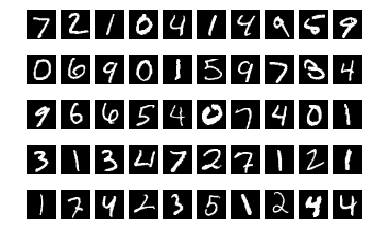

In [3]:
import matplotlib.pyplot as plt

# テスト用画像データ取得
images = x_test.reshape(10000, 28, 28)

plotpos = 1
for idx in range(50):
    # 画像データのイメージを表示
    plt.subplot(5, 10, plotpos)
    plt.imshow(images[idx])
    plt.gray()
    plt.axis('off')
    plotpos += 1
plt.show()

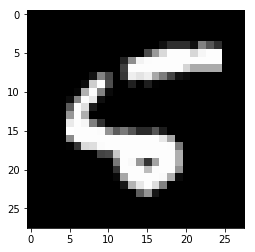

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [4]:
# 9番目の画像なんて書いてるの？
idx = 8

# 画像データのイメージを表示
plt.imshow(images[idx])
plt.gray()
#plt.axis('off')
plt.show()

# 正解データを表示
print(y_test[idx])

In [7]:
# モデルの概要表示
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
__________

In [8]:
# モデルと学習済みパラメータの保存
print("save model as HDF5")
model.save('./CQseminar/mnist_cnn_train1.h5')

save model as HDF5


In [9]:
from keras.models import load_model

# コンパイル済み、学習済みモデルをロード
model2 = load_model('./CQseminar/mnist_cnn_train1.h5')

# 再学習
history2 = model2.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=20,             # 20回追加学習
                      verbose=1,
                      validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 36s - loss: 0.1201 - acc: 0.9640 - val_loss: 0.0455 - val_acc: 0.9842
Epoch 2/20
60000/60000 [==============================] - 37s - loss: 0.0868 - acc: 0.9744 - val_loss: 0.0351 - val_acc: 0.9888
Epoch 3/20
60000/60000 [==============================] - 37s - loss: 0.0709 - acc: 0.9784 - val_loss: 0.0275 - val_acc: 0.9915
Epoch 4/20
60000/60000 [==============================] - 37s - loss: 0.0619 - acc: 0.9812 - val_loss: 0.0279 - val_acc: 0.9905
Epoch 5/20
60000/60000 [==============================] - 38s - loss: 0.0533 - acc: 0.9838 - val_loss: 0.0237 - val_acc: 0.9921
Epoch 6/20
60000/60000 [==============================] - 38s - loss: 0.0492 - acc: 0.9851 - val_loss: 0.0248 - val_acc: 0.9913
Epoch 7/20
60000/60000 [==============================] - 40s - loss: 0.0435 - acc: 0.9867 - val_loss: 0.0230 - val_acc: 0.9920
Epoch 8/20
60000/60000 [==============================

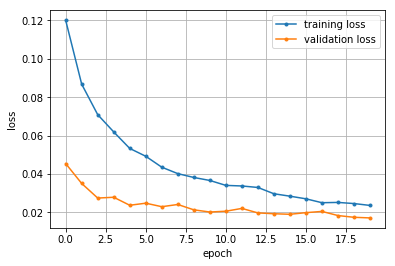

In [10]:
# 学習ヒストリーをグラフ描画
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epoch = len(loss)
plt.plot(range(epoch), loss, marker='.', label='training loss')
plt.plot(range(epoch), val_loss, marker='.', label='validation loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
# モデルと学習済みパラメータの保存
print("save model as HDF5")
model2.save('./CQseminar/mnist_cnn_train1_fine20.h5')

print("done")

save model as HDF5
done


In [12]:
# 各層の設定とパラメータ（重み・バイアス）を表示
for layer in model2.layers:
    lay_config = layer.get_config()
    lay_weights = layer.get_weights()
    print('*** layer config ***')
    print(lay_config)
    print('*** layer weights ***')
    print(lay_weights)

*** layer config ***
{'activation': 'relu', 'kernel_size': (5, 5), 'use_bias': True, 'strides': (1, 1), 'name': 'conv2d_1', 'kernel_constraint': None, 'padding': 'valid', 'dilation_rate': (1, 1), 'kernel_regularizer': None, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'distribution': 'uniform', 'seed': None, 'mode': 'fan_avg'}}, 'filters': 16, 'activity_regularizer': None, 'bias_regularizer': None, 'bias_constraint': None, 'dtype': 'float32', 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'data_format': 'channels_last', 'batch_input_shape': (None, 28, 28, 1), 'trainable': True}
*** layer weights ***
[array([[[[ 0.07024435, -0.03104209, -0.23225383,  0.09466134,  0.04093608,
          -0.08859611,  0.06063645, -0.03116746,  0.0895713 ,  0.06725249,
           0.0137128 ,  0.00927572,  0.14721639,  0.29065999,  0.05799748,
           0.1446702 ]],

        [[ 0.06392136, -0.00896779, -0.1185377 ,  0.09939036, -0.05902884,
          -0.10239

*** layer config ***
{'pool_size': (2, 2), 'data_format': 'channels_last', 'name': 'max_pooling2d_2', 'padding': 'valid', 'strides': (2, 2), 'trainable': True}
*** layer weights ***
[]
*** layer config ***
{'name': 'dropout_1', 'rate': 0.25, 'trainable': True}
*** layer weights ***
[]
*** layer config ***
{'name': 'flatten_1', 'trainable': True}
*** layer weights ***
[]
*** layer config ***
{'activation': 'relu', 'use_bias': True, 'name': 'dense_1', 'kernel_constraint': None, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'distribution': 'uniform', 'seed': None, 'mode': 'fan_avg'}}, 'bias_constraint': None, 'bias_regularizer': None, 'kernel_regularizer': None, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'activity_regularizer': None, 'units': 128, 'trainable': True}
*** layer weights ***
[array([[ -4.49418984e-02,  -4.15019691e-02,  -3.73691052e-01,
          8.29041004e-02,  -7.73286680e-03,  -4.21851724e-02,
          9.29825287e-03,   

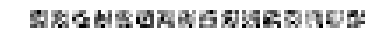

In [18]:
# 重みパラメータを画像データとして出力

#  入力層(Channel:1, Figure Width:28, Figure Height:28)
#  畳み込み層1(Activation:ReLU, Channel:16, Filter Width:5, Filter Heights:5)
#  重み(Array[5][5][1][16]), バイアス(Array[16])
layidx = 0
params_list = model2.layers[0].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]

images = weights_array.reshape(1, 16, 5, 5)

plotpos = 1
for idx in range(16):
    # 画像データのイメージを表示
    plt.subplot(1, 16, plotpos)
    plt.imshow(images[0][idx])
    plt.gray()
    plt.axis('off')
    plotpos += 1
plt.show()

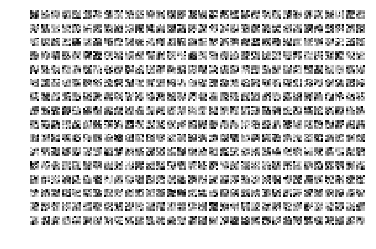

In [14]:
# 重みパラメータを画像データとして出力

# 層間パラメータをJSONで書き出し
#  最大プーリング層(Channel:16, Figure Width:12, Figure Height:12)
#  畳み込み層2(Activation:ReLU, Channel:32, Filter Width:8, Filter Heights:8)
#  重み(Array[5][5][16][32]), バイアス(Array[32])
layidx = 2
params_list = model2.layers[layidx].get_weights()
weights_array = params_list[0]

images = weights_array.reshape(16, 32, 5, 5)

plotpos = 1
for idx1 in range(16):
    for idx2 in range(32):
        # 画像データのイメージを表示
        plt.subplot(16, 32, plotpos)
        plt.imshow(images[idx1][idx2])
        plt.gray()
        plt.axis('off')
        plotpos += 1
plt.show()

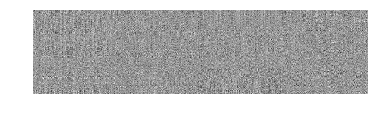

In [19]:
# 層間パラメータをJSONで書き出し
#  平滑化層(Channel:512)
#  全結合層(Activation:ReLU, Channel:128)
#  重み(Array[512][128]), バイアス(Array[128])
layidx = 6
params_list = model2.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]

image = weights_array.reshape(128, 512)

# 画像データのイメージを表示
plt.imshow(image)
plt.gray()
plt.axis('off')
plt.show()

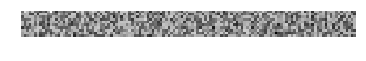

In [20]:
# 層間パラメータをJSONで書き出し
#  全結合層(ReLU, Channel:128)
#  全結合層(Activation:Softmax, Channel:10)
#  重み(Array[128][10]), バイアス(Array[10])
layidx = 8
params_list = model2.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]

image = weights_array.reshape(10, 128)

# 画像データのイメージを表示
plt.imshow(image)
plt.gray()
plt.axis('off')
plt.show()

In [21]:
# コンパイル済み、学習済みモデルをロード
model3 = load_model('./CQseminar/mnist_cnn_train1_fine20.h5')

# 再学習
history3 = model3.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=100,             # 100回追加学習
                      verbose=1,
                      validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 35s - loss: 0.0228 - acc: 0.9929 - val_loss: 0.0178 - val_acc: 0.9944
Epoch 2/100
60000/60000 [==============================] - 38s - loss: 0.0224 - acc: 0.9926 - val_loss: 0.0183 - val_acc: 0.9937
Epoch 3/100
60000/60000 [==============================] - 38s - loss: 0.0210 - acc: 0.9931 - val_loss: 0.0194 - val_acc: 0.9947
Epoch 4/100
60000/60000 [==============================] - 40s - loss: 0.0198 - acc: 0.9940 - val_loss: 0.0186 - val_acc: 0.9947
Epoch 5/100
60000/60000 [==============================] - 40s - loss: 0.0199 - acc: 0.9935 - val_loss: 0.0172 - val_acc: 0.9944
Epoch 6/100
60000/60000 [==============================] - 37s - loss: 0.0179 - acc: 0.9941 - val_loss: 0.0196 - val_acc: 0.9940
Epoch 7/100
60000/60000 [==============================] - 36s - loss: 0.0184 - acc: 0.9939 - val_loss: 0.0214 - val_acc: 0.9936
Epoch 8/100
60000/60000 [======================

60000/60000 [==============================] - 37s - loss: 0.0103 - acc: 0.9968 - val_loss: 0.0216 - val_acc: 0.9952
Epoch 64/100
60000/60000 [==============================] - 37s - loss: 0.0099 - acc: 0.9968 - val_loss: 0.0240 - val_acc: 0.9945
Epoch 65/100
60000/60000 [==============================] - 37s - loss: 0.0090 - acc: 0.9971 - val_loss: 0.0237 - val_acc: 0.9953
Epoch 66/100
60000/60000 [==============================] - 39s - loss: 0.0107 - acc: 0.9966 - val_loss: 0.0243 - val_acc: 0.9948
Epoch 67/100
60000/60000 [==============================] - 37s - loss: 0.0104 - acc: 0.9968 - val_loss: 0.0268 - val_acc: 0.9941
Epoch 68/100
60000/60000 [==============================] - 39s - loss: 0.0090 - acc: 0.9973 - val_loss: 0.0248 - val_acc: 0.9948
Epoch 69/100
60000/60000 [==============================] - 38s - loss: 0.0096 - acc: 0.9970 - val_loss: 0.0234 - val_acc: 0.9946
Epoch 70/100
60000/60000 [==============================] - 37s - loss: 0.0080 - acc: 0.9976 - val_loss

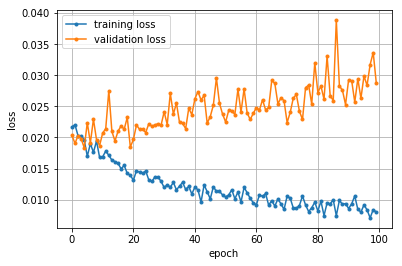

In [16]:
# 学習ヒストリーをグラフ描画
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epoch = len(loss)
plt.plot(range(epoch), loss, marker='.', label='training loss')
plt.plot(range(epoch), val_loss, marker='.', label='validation loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [17]:
# モデルと学習済みパラメータの保存
print("save model as HDF5")
model3.save('./CQseminar/mnist_cnn_train1_fine20_fine100.h5')

print("done")

save model as HDF5
done


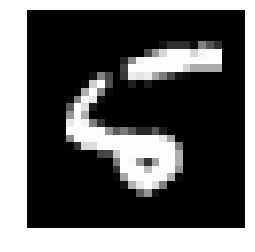

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
Test loss: 0.0121077783406
Test accuracy: 1.0


In [17]:
# テスト用画像データ取得
images = x_test.reshape(10000, 28, 28)

# 9番目の画像なんて書いてるの？
idx = 8

# 画像データのイメージを表示
plt.imshow(images[idx])
plt.gray()
plt.axis('off')
plt.show()

# 正解データを表示
print(y_test[idx])

x_eval = images[idx].reshape(1, 28, 28, 1)
y_eval = y_test[idx].reshape(1, 10)

# 検証
score = model2.evaluate(x_eval, y_eval, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [19]:
import codecs, json

print("output weights as JSON")

filename = "mnist_cnn_train121_params_layer%d.json"

# 層間パラメータをJSONで書き出し
#  入力層(Channel:1, Figure Width:28, Figure Height:28)
#  畳み込み層1(Activation:ReLU, Channel:16, Filter Width:5, Filter Heights:5)
#  重み(Array[5][5][1][16]), バイアス(Array[16])
layidx = 0
params_list = model3.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)

# 層間パラメータなし
#  畳み込み層1(Activation:ReLU, Channel:32, Filter Width:8, Filter Heights:8)
#  最大プーリング層(Channel:16, Figure Width:12, Figure Height:12)
layidx = 1

# 層間パラメータをJSONで書き出し
#  最大プーリング層(Channel:16, Figure Width:12, Figure Height:12)
#  畳み込み層2(Activation:ReLU, Channel:32, Filter Width:8, Filter Heights:8)
#  重み(Array[5][5][16][32]), バイアス(Array[32])
layidx = 2
params_list = model3.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)

# 層間パラメータなし
#  畳み込み層2(Activation:ReLU, Channel:32, Filter Width:8, Filter Heights:8)
#  最大プーリング層(Channel:32, Figure Width:4, Figure Height:4)
layidx = 3

# 層間パラメータなし
#  ドロップアウト層(Dropout rate:0.25)
#  データフォーマット変化なし
layidx = 4

# 層間パラメータなし
#  最大プーリング層(Channel:32, Figure Width:4, Figure Height:4)
#  平滑化層(Channel:512)
layidx = 5

# 層間パラメータをJSONで書き出し
#  平滑化層(Channel:512)
#  全結合層(Activation:ReLU, Channel:128)
#  重み(Array[512][128]), バイアス(Array[128])
layidx = 6
params_list = model3.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)

# 層間パラメータなし
#  ドロップアウト層(Dropout rate:0.5, Channel:128)
#  データフォーマット変化なし
layidx = 7

# 層間パラメータをJSONで書き出し
#  全結合層(ReLU, Channel:128)
#  全結合層(Activation:Softmax, Channel:10)
#  重み(Array[128][10]), バイアス(Array[10])
layidx = 8
params_list = model3.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)

print("done")

output weights as JSON
done
